In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host,
                                                           postgres_port, postgres_db))
usaed_df = pd.read_sql_query('select * from useducation', con = engine)

## Determine all the variable types and find the fraction of the missing values for each variable.

In [3]:
usaed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

## Missing value percentages

In [4]:
usaed_df.isnull().sum()*100/usaed_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## Last 4 columns have more than 60% of missing data and we will not be using those variables in the data

## Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [5]:
column_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

In [6]:
us_ed_df = usaed_df.copy()

In [7]:
for col in column_list:
    us_ed_df.loc[:, col] = us_ed_df.loc[:, col].fillna(us_ed_df.loc[:, col].mean())
    

In [8]:
us_ed_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                            0
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                       0
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                      0
GRADES_9_12_G                     0
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [9]:
us_ed_df.shape

(1492, 25)

In [10]:
us_ed_df.drop(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis =1, inplace = True)

In [11]:
us_ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 21 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

## Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [12]:
educ_df = usaed_df.copy()
years = educ_df['YEAR'].unique() 

In [13]:
years

array([1992, 2001, 1993, 2016, 1994, 1995, 1996, 1997, 1998, 1999, 2017,
       2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [14]:
for col in column_list:
    for year in years:
        educ_df.loc[educ_df['YEAR'] == year, col ] = educ_df.loc[educ_df['YEAR'] == year, col].fillna(
            educ_df[educ_df['YEAR'] == year][ col].mean())

In [15]:
educ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1385 non-null float64
TOTAL_REVENUE                   1441 non-null float64
FEDERAL_REVENUE                 1441 non-null float64
STATE_REVENUE                   1441 non-null float64
LOCAL_REVENUE                   1441 non-null float64
TOTAL_EXPENDITURE               1441 non-null float64
INSTRUCTION_EXPENDITURE         1441 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1441 non-null float64
OTHER_EXPENDITURE               1385 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1441 non-null float64
GRADES_PK_G                     1390 non-null float64
GRADES_KG_G                     1390 non-null float64
GRADES_4_G                      1390 non-null float64
GRADES_8_G                      1

##  This time, fill in the missing values using interpolation (extrapolation).

In [16]:
us2 = usaed_df.copy()

In [17]:
for col in column_list:
    us2.loc[:, col] = us2.loc[:, col].fillna(us2.loc[:,col].interpolate())

In [18]:
us2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1456 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

In [19]:
education4_df = usaed_df.copy()

In [20]:
for col in column_list:
    education4_df.loc[:, col] = education4_df.loc[:, col].interpolate()

In [21]:
education4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1456 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

In [22]:
education4_df = usaed_df.copy()

In [23]:
for col in column_list:
    education4_df.loc[:, col] = education4_df.loc[:, col].interpolate(limit_direction = 'both')

In [24]:
education4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

##  Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [25]:
datasets = [us_ed_df , educ_df, us2, education4_df]
for i in datasets:
    print(i.describe())

              YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1492.000000  1.492000e+03   1.492000e+03     1.492000e+03   
mean   2004.433646  9.159308e+05   9.092082e+06     7.663723e+05   
std       7.393983  9.667725e+05   1.087818e+07     1.060702e+06   
min    1992.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1998.000000  3.150940e+05   2.546261e+06     2.170200e+05   
50%    2004.000000  8.204140e+05   6.359310e+06     5.167410e+05   
75%    2011.000000  9.211780e+05   9.276958e+06     7.663723e+05   
max    2017.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.492000e+03   1.492000e+03       1.492000e+03   
mean    4.216553e+06   4.109157e+06       9.196681e+06   
std     5.133895e+06   5.078230e+06       1.109393e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.356434e+06   9.447962e+05       2.523968e+06   
50%     3.127639e+06   2.697257e+06    

              YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1492.000000  1.492000e+03   1.492000e+03     1.492000e+03   
mean   2004.433646  9.838759e+05   1.111164e+07     8.922691e+05   
std       7.393983  1.006773e+06   1.200155e+07     1.106788e+06   
min    1992.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1998.000000  2.821195e+05   2.546261e+06     2.170200e+05   
50%    2004.000000  7.373935e+05   6.351760e+06     5.165190e+05   
75%    2011.000000  1.595024e+06   1.803650e+07     1.411794e+06   
max    2017.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.492000e+03   1.492000e+03       1.492000e+03   
mean    4.913351e+06   5.306024e+06       1.114374e+07   
std     5.423675e+06   5.900909e+06       1.212433e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.356434e+06   9.447962e+05       2.523968e+06   
50%     3.119414e+06   2.650904e+06    

In [26]:
us2.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [27]:
us2.drop(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis =1, inplace = True)

In [28]:
us2.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'],
      dtype='object')

## Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [29]:
us2.columns = us2.columns.str.lower()

In [30]:
us2.columns

Index(['primary_key', 'state', 'year', 'enroll', 'total_revenue',
       'federal_revenue', 'state_revenue', 'local_revenue',
       'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'grades_pk_g', 'grades_kg_g',
       'grades_4_g', 'grades_8_g', 'grades_12_g', 'grades_1_8_g',
       'grades_9_12_g', 'grades_all_g'],
      dtype='object')

Text(0.5, 1.0, 'Total Expenditure with 1.5 whisker')

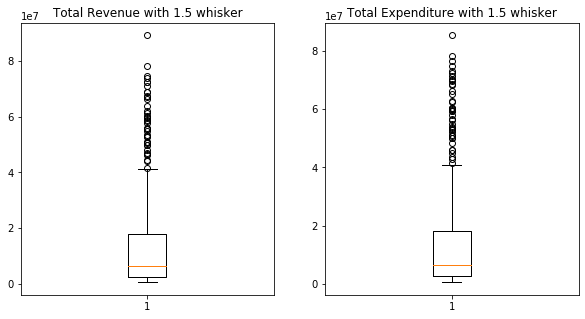

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(us2.total_revenue)
plt.title('Total Revenue with 1.5 whisker')
plt.subplot(1,2,2)
plt.boxplot(us2.total_expenditure)
plt.title('Total Expenditure with 1.5 whisker')

## it appears that both the columns have a lot of outliers

## 2. f you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [32]:
from scipy.stats.mstats import winsorize
winsorized_revenue = winsorize(us2['total_revenue'], (0, 0.05))
winsorized_exp = winsorize(us2['total_expenditure'], (0, 0.05))

Text(0.5, 1.0, 'WINSORIZED EXPENDITURE')

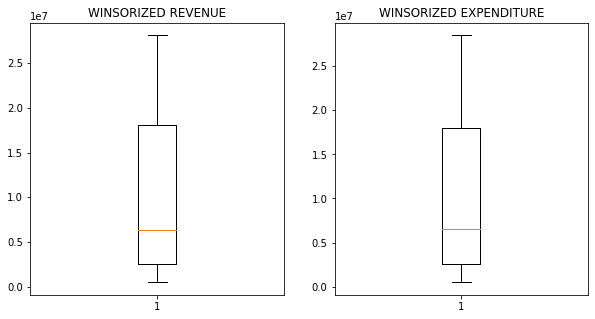

In [33]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue)
plt.title('WINSORIZED REVENUE')
plt.subplot(1,2,2)
plt.boxplot(winsorized_exp)
plt.title('WINSORIZED EXPENDITURE')

## 3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [34]:
us2['budget_deficit'] =  us2['total_revenue']-us2['total_expenditure']

In [35]:
us2.head()

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,capital_outlay_expenditure,grades_pk_g,grades_kg_g,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,budget_deficit
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,25087.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,77103.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,-878807.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a18467c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a18473390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a18467860>],
 'medians': [<matplotlib.lines.Line2D at 0x1a18473a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a18473d68>],
 'means': []}

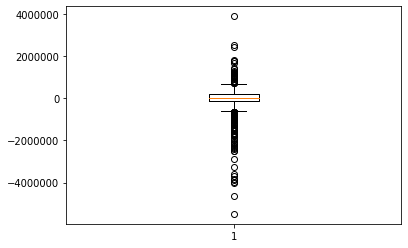

In [36]:
plt.boxplot(us2['budget_deficit'])

In [37]:
winsorized_budgetdeficit = winsorize(us2['budget_deficit'], (0.05,0.05))


{'whiskers': [<matplotlib.lines.Line2D at 0x1a18531940>,
 'caps': [<matplotlib.lines.Line2D at 0x1a18531fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a18531550>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1853d6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1853d9e8>],
 'means': []}

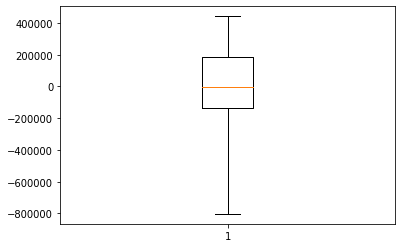

In [38]:
plt.boxplot(winsorized_budgetdeficit, whis =5)

In [39]:
new_bud = winsorized_revenue - winsorized_exp

{'whiskers': [<matplotlib.lines.Line2D at 0x1a18597be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a18597f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a185977f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a185a19b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a185a1cf8>],
 'means': []}

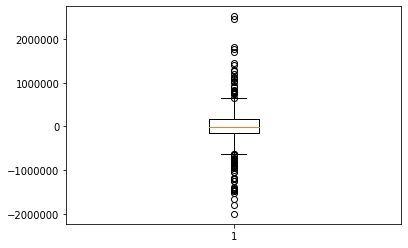

In [40]:
plt.boxplot(new_bud)

In [41]:
wins_new_bud = winsorize(new_bud, (0.05, 0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a186e3630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a186e3d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a186e3240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a186ed400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a186ed748>],
 'means': []}

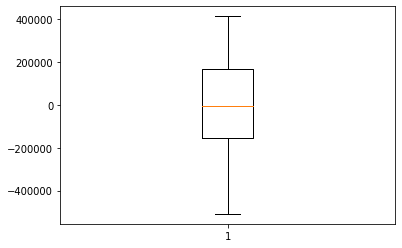

In [42]:
plt.boxplot(wins_new_bud, whis = 5)

## 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [43]:
budget_deficit = us2['budget_deficit']

In [44]:
pd.DataFrame({'original_budget': budget_deficit, 'winsorized_budget1': winsorized_budgetdeficit, 'winsorized_budget2': wins_new_bud}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,1.492000e+03,1492.000000,1492.000000
mean,-3.209622e+04,-5852.697051,5979.659517
std,5.607748e+05,315970.963721,268064.378117
min,-5.487742e+06,-803208.000000,-509360.000000
25%,-1.368148e+05,-136814.750000,-152551.500000
50%,-5.355000e+02,-535.500000,-3443.500000
75%,1.876285e+05,187628.500000,168423.500000
max,3.897129e+06,442351.000000,414013.000000


## 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

### Sometimes, differencing may help us to eliminate the outliers. So, it's better to first create a variable from the originals and then to apply outlier elimination techniques next. Hence, the approach in the third question is more desirable in most of the cases.


# DATA EXPLORATION 1

In [45]:
us2 = usaed_df.copy()

In [46]:
states= us2['STATE'].unique()

In [47]:
for state in states:
    us2.loc[us2['STATE'] == state, column_list] = us2.loc[us2['STATE'] == state, column_list].interpolate()

In [48]:
us5 = us2.dropna()
us5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 209 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [49]:
us5.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


### Mean Total Expenditure is greater than Mean Total Revenue
### Mean of Local Revenue is almost same as State revenue
### Mean of all the variables is a lot higher than the median. 

# 2.Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

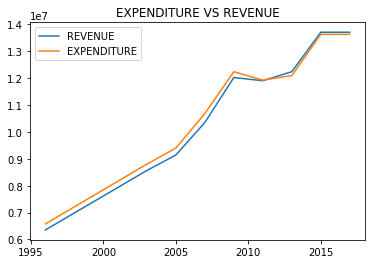

In [50]:
plt.plot(us5.loc[us5['STATE']== 'WASHINGTON', 'YEAR'], us5.loc[us5.STATE == 'WASHINGTON', 'TOTAL_REVENUE'],
        label = 'REVENUE')
plt.plot(us5.loc[us5.STATE == 'WASHINGTON', 'YEAR'], us5.loc[us5.STATE == 'WASHINGTON', 'TOTAL_EXPENDITURE'], label = 'EXPENDITURE')
plt.title('EXPENDITURE VS REVENUE')
plt.legend()

### It appears that the expenditure was more than revenue from 1995 to 2012, then revenue was higher from 2012 till 2017

## 3. In your chosen state, which of the lessons are the students more successful, math or reading?

Text(0.5, 1.0, 'MATH 4 VS READING 4')

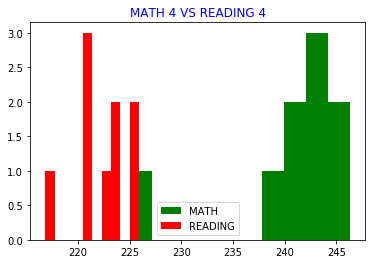

In [51]:
plt.hist(us5.loc[us5.STATE == 'WASHINGTON', 'AVG_MATH_4_SCORE'], color = 'g', label = 'MATH')
plt.hist(us5.loc[us5.STATE == 'WASHINGTON', 'AVG_READING_4_SCORE'], color = 'r', label = 'READING')
plt.legend()
plt.title('MATH 4 VS READING 4', color = 'blue')

## it is clear that the students are more succesfull in Math than reading 

In [52]:
us5.loc[us5.STATE == 'WASHINGTON', 'AVG_MATH_4_SCORE']-us5.loc[us5.STATE == 'WASHINGTON', 'AVG_READING_4_SCORE']

256      8.206331
620     17.196144
723     18.198277
828     18.542895
936     20.926981
1040    22.654097
1144    21.239475
1246    19.088533
1488    18.577592
dtype: float64

Text(0.5, 1.0, 'MATH 8 VS READING 8')

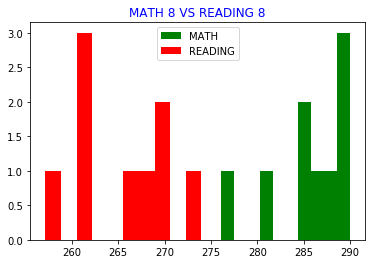

In [53]:
plt.hist(us5.loc[us5.STATE == 'WASHINGTON', 'AVG_MATH_8_SCORE'], color = 'g', label = 'MATH')
plt.hist(us5.loc[us5.STATE == 'WASHINGTON', 'AVG_READING_8_SCORE'], color = 'r', label = 'READING')
plt.legend()
plt.title('MATH 8 VS READING 8', color = 'b')

## 4. What are the distributions of the math and reading scores in the sample?

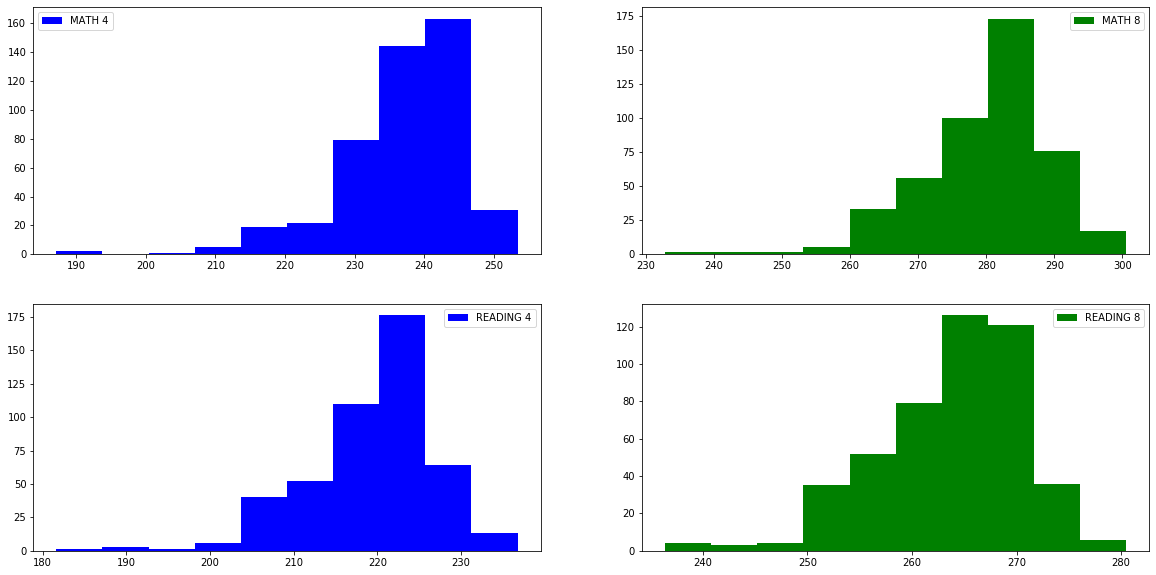

In [54]:
plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
plt.hist(us5.AVG_MATH_4_SCORE, label = 'MATH 4', color = 'b')
plt.legend()
plt.subplot(2,2,2)
plt.hist(us5.AVG_MATH_8_SCORE, label = 'MATH 8', color = 'g')
plt.legend()
plt.subplot(2,2,3)
plt.hist(us5.AVG_READING_4_SCORE, label = 'READING 4', color = 'b')
plt.legend()
plt.subplot(2,2,4)
plt.hist(us5.AVG_READING_8_SCORE, label = 'READING 8', color = 'g')
plt.legend()

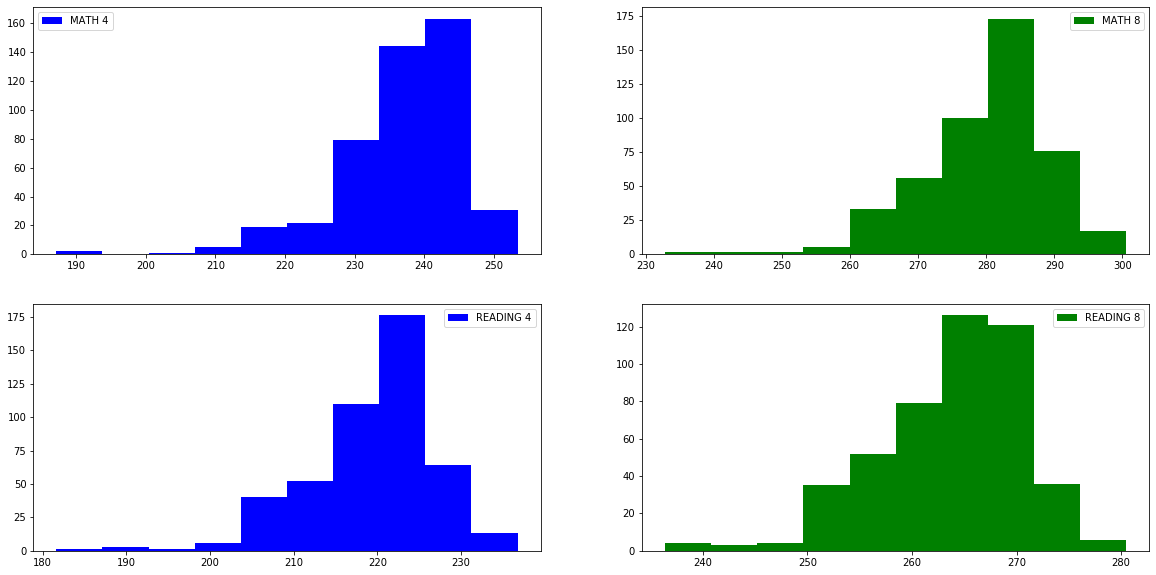

In [55]:
plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
plt.hist(us5.AVG_MATH_4_SCORE.dropna(), label = 'MATH 4', color = 'b')
plt.legend()
plt.subplot(2,2,2)
plt.hist(us5.AVG_MATH_8_SCORE.dropna(), label = 'MATH 8', color = 'g')
plt.legend()
plt.subplot(2,2,3)
plt.hist(us5.AVG_READING_4_SCORE.dropna(), label = 'READING 4', color = 'b')
plt.legend()
plt.subplot(2,2,4)
plt.hist(us5.AVG_READING_8_SCORE.dropna(), label = 'READING 8', color = 'g')
plt.legend()

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [56]:
us6_mean = usaed_df.copy()

In [57]:
column_list1 = ['ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [58]:
for col in column_list1:
    us6_mean.loc[:, col] = us6_mean.loc[:, col].fillna(us6_mean.loc[:, col].mean())

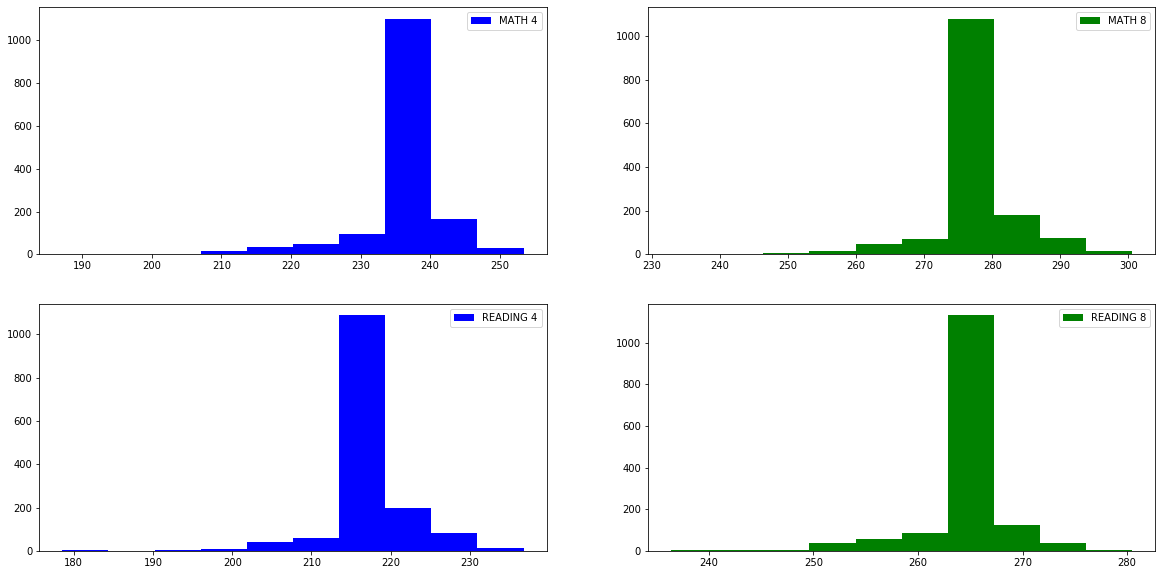

In [59]:
plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
plt.hist(us6_mean.AVG_MATH_4_SCORE, label = 'MATH 4', color = 'b')
plt.legend()
plt.subplot(2,2,2)
plt.hist(us6_mean.AVG_MATH_8_SCORE, label = 'MATH 8', color = 'g')
plt.legend()
plt.subplot(2,2,3)
plt.hist(us6_mean.AVG_READING_4_SCORE, label = 'READING 4', color = 'b')
plt.legend()
plt.subplot(2,2,4)
plt.hist(us6_mean.AVG_READING_8_SCORE, label = 'READING 8', color = 'g')
plt.legend()

In [60]:
us6_median = usaed_df.copy()

In [61]:
for col in column_list1:
    us6_median.loc[:, col] = us6_median.loc[:, col].fillna(us6_median.loc[:, col].median())

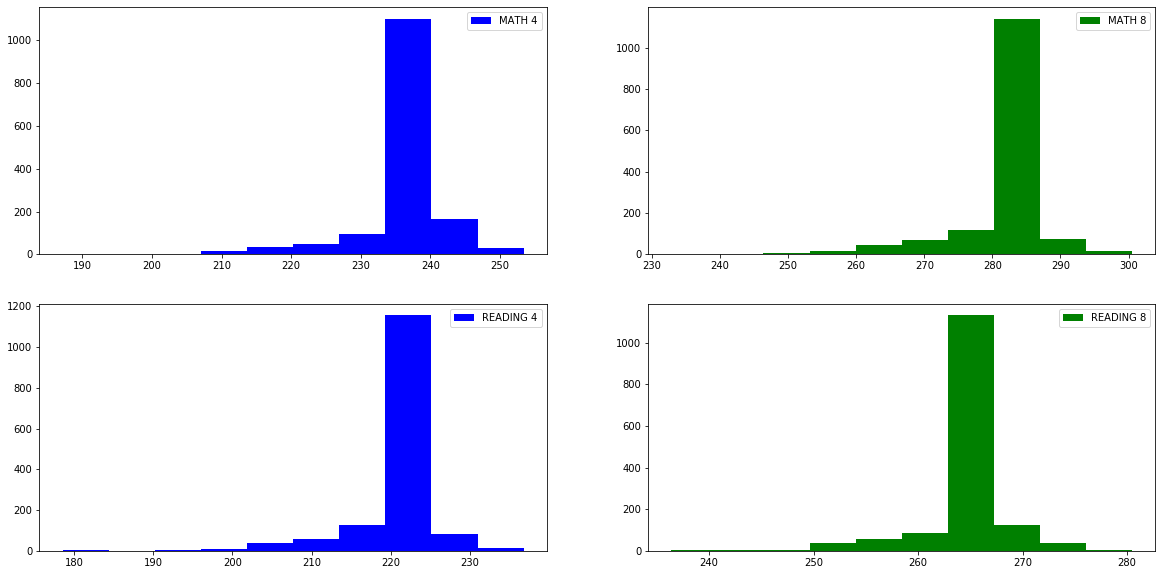

In [62]:
plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
plt.hist(us6_median.AVG_MATH_4_SCORE, label = 'MATH 4', color = 'b')
plt.legend()
plt.subplot(2,2,2)
plt.hist(us6_median.AVG_MATH_8_SCORE, label = 'MATH 8', color = 'g')
plt.legend()
plt.subplot(2,2,3)
plt.hist(us6_median.AVG_READING_4_SCORE, label = 'READING 4', color = 'b')
plt.legend()
plt.subplot(2,2,4)
plt.hist(us6_median.AVG_READING_8_SCORE, label = 'READING 8', color = 'g')
plt.legend()

In [63]:
us6_inter = usaed_df.copy()

In [64]:
for col in column_list1:
    us6_inter.loc[:, col] = us6_inter.loc[:, col].interpolate()

In [65]:
us6_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1456 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

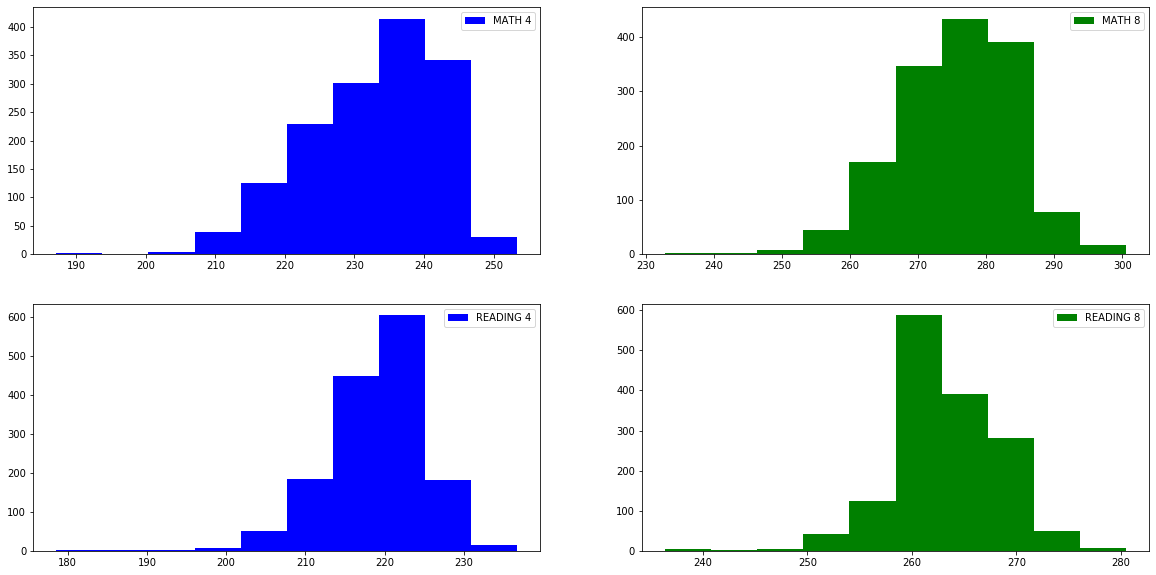

In [66]:
plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
plt.hist(us6_inter.AVG_MATH_4_SCORE, label = 'MATH 4', color = 'b')
plt.legend()
plt.subplot(2,2,2)
plt.hist(us6_inter.AVG_MATH_8_SCORE, label = 'MATH 8', color = 'g')
plt.legend()
plt.subplot(2,2,3)
plt.hist(us6_inter.AVG_READING_4_SCORE, label = 'READING 4', color = 'b')
plt.legend()
plt.subplot(2,2,4)
plt.hist(us6_inter.AVG_READING_8_SCORE, label = 'READING 8', color = 'g')
plt.legend()

In [67]:
us6_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1456 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

In [69]:
education_df = us6_inter.copy()

## 1.Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.

In [71]:
education_df["overall_score"] = (education_df["GRADES_4_G"]*((education_df["AVG_MATH_4_SCORE"] + education_df["AVG_READING_4_SCORE"])*0.5) + education_df["GRADES_8_G"]
                                 * ((education_df["AVG_MATH_8_SCORE"] + education_df["AVG_READING_8_SCORE"])*0.5))/(education_df["GRADES_4_G"] + education_df["GRADES_8_G"])


## 2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?

In [74]:
education_df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,overall_score,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.210299,0.212710,0.227378,0.169775,0.136603
TOTAL_EXPENDITURE,0.210299,1.000000,0.992757,0.992496,0.951726,0.928443
INSTRUCTION_EXPENDITURE,0.212710,0.992757,1.000000,0.979327,0.920297,0.896026
SUPPORT_SERVICES_EXPENDITURE,0.227378,0.992496,0.979327,1.000000,0.953411,0.905785
OTHER_EXPENDITURE,0.169775,0.951726,0.920297,0.953411,1.000000,0.923468
CAPITAL_OUTLAY_EXPENDITURE,0.136603,0.928443,0.896026,0.905785,0.923468,1.000000


## 3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = education4_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

In [76]:
X = StandardScaler().fit_transform(X)

In [77]:
sklearn_pca = PCA(n_components=1)
education_df['pca_1'] = sklearn_pca.fit_transform(X)

In [79]:
print("The percentage of Total Variance in the dataset explained by each component from SKlearn PCA.\n", 
     sklearn_pca.explained_variance_ratio_)

The percentage of Total Variance in the dataset explained by each component from SKlearn PCA.
 [0.94618368]


## 4. What is the correlation between the overall score variable and the 1st principal component?

In [80]:
education_df[["overall_score", "pca_1", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,overall_score,pca_1,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.197356,0.210299,0.212710,0.227378,0.169775,0.136603
pca_1,0.197356,1.000000,0.992724,0.974930,0.985919,0.975379,0.956322
TOTAL_EXPENDITURE,0.210299,0.992724,1.000000,0.992757,0.992496,0.951726,0.928443
INSTRUCTION_EXPENDITURE,0.212710,0.974930,0.992757,1.000000,0.979327,0.920297,0.896026
SUPPORT_SERVICES_EXPENDITURE,0.227378,0.985919,0.992496,0.979327,1.000000,0.953411,0.905785
OTHER_EXPENDITURE,0.169775,0.975379,0.951726,0.920297,0.953411,1.000000,0.923468
CAPITAL_OUTLAY_EXPENDITURE,0.136603,0.956322,0.928443,0.896026,0.905785,0.923468,1.000000


## 5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

## It is not a good idea to use PCA for highly correlated variables